In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

In [2]:
filenames = os.listdir("D:\\first\\JPEGImages")         # Getting dataset
print("number of pictures = ", len(filenames))          # print number of Images

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\first\\JPEGImages'

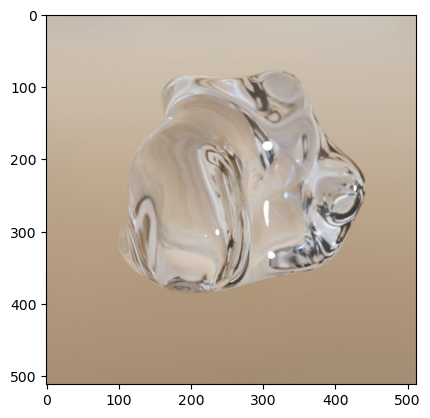

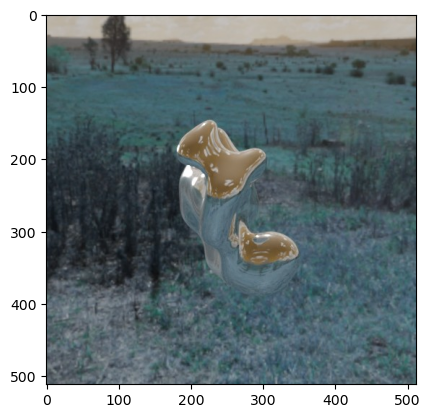

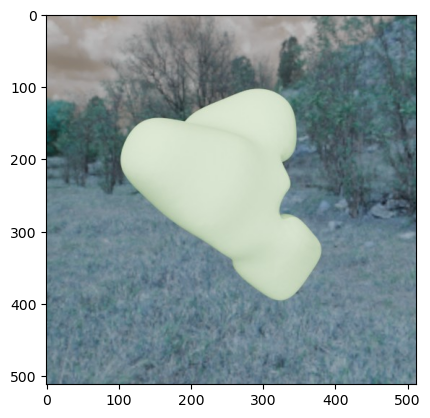

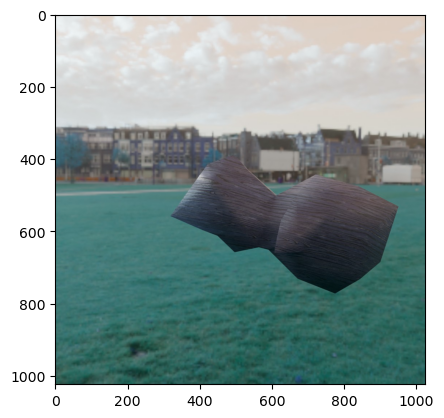

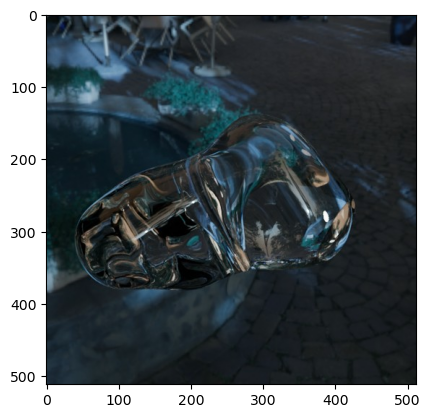

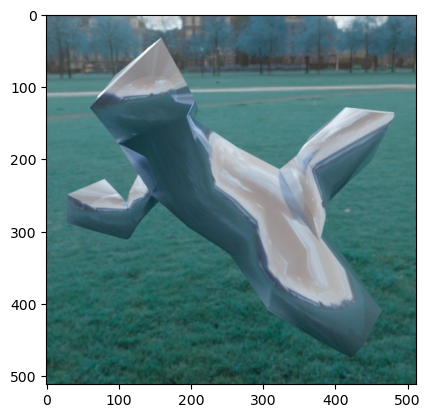

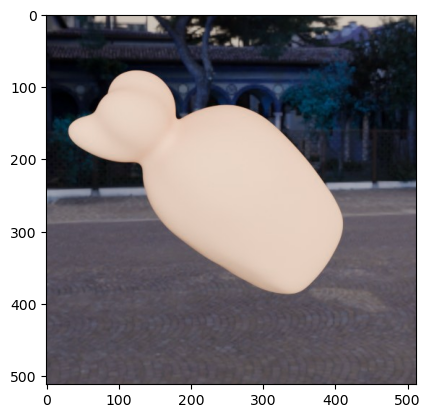

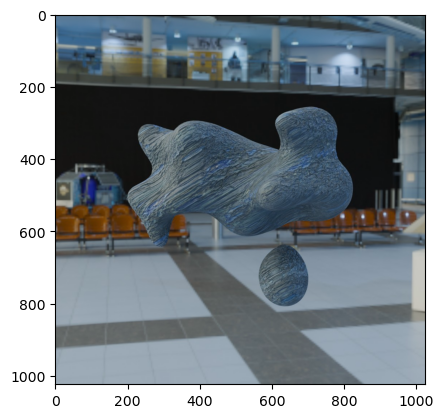

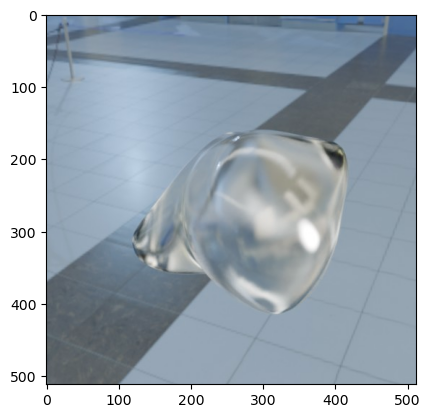

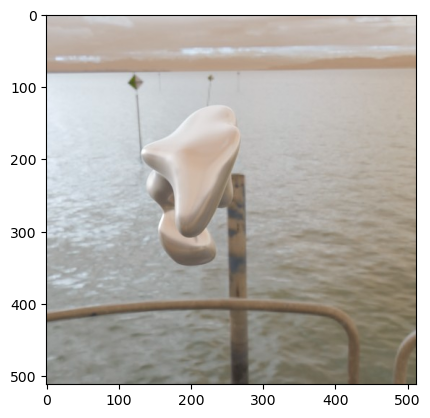

In [3]:
# Showing The first 10 Images in dataset
i = 0
for filename in filenames:
    img_array = cv2.imread(os.path.join("D:\\first\\JPEGImages", filename))
    plt.imshow(img_array, cmap = "gray")
    i+=1
    plt.show()
    if i == 10:
        break

In [4]:
# Generate ImageDataGenerator (Data augmentation)
datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = "nearest"
)

In [5]:
img = load_img("D:\\first\\JPEGImages\\image_0001_g.jpg")   # Getting first picture (glass)
x = img_to_array(img)                                       # Change it to Numpy array
x = x.reshape((1, ) + x.shape)
i = 0
# This For loop will augment 5 Image in first Image (glass) and save it to JPEGImages Directory
for batch in datagen.flow(x, batch_size = 1, save_to_dir = "JPEGImages", save_prefix = "glass", save_format = "jpg"):
    i += 1
    if i > 5:
        break

In [6]:
img = load_img("D:\\first\\JPEGImages\\image_0001_m.jpg")   # Getting Second picture (metal)
x = img_to_array(img)                                       # Change it to Numpy array
x = x.reshape((1, ) + x.shape)
i = 0
# This For loop will augment 5 Image in first Image (metal) and save it to JPEGImages Directory
for batch in datagen.flow(x, batch_size = 1, save_to_dir = "JPEGImages", save_prefix = "metal", save_format = "jpg"):
    i += 1
    if i > 5:
        break

In [7]:
img = load_img("D:\\first\\JPEGImages\\image_0001_p.jpg")      # Getting Second picture (plastic)
x = img_to_array(img)                                          # Change it to Numpy array
x = x.reshape((1, ) + x.shape)
i = 0
# This For loop will augment 5 Image in first Image (plastic) and save it to JPEGImages Directory
for batch in datagen.flow(x, batch_size = 1, save_to_dir = "JPEGImages", save_prefix = "plastic", save_format = "jpg"):
    i += 1
    if i > 5:
        break

In [8]:
img = load_img("D:\\first\\JPEGImages\\image_0001_w.jpg")       # Getting Second picture (wood)
x = img_to_array(img)                                           # Change it to Numpy array
x = x.reshape((1, ) + x.shape)
i = 0
# This For loop will augment 5 Image in first Image (plastic) and save it to JPEGImages Directory
for batch in datagen.flow(x, batch_size = 1, save_to_dir = "JPEGImages", save_prefix = "wood", save_format = "jpg"):
    i += 1
    if i > 5:
        break

In [9]:
# It will read Dataset after augmentation
filenames = os.listdir("D:\\first\\JPEGImages")
print("number of pictures = ", len(filenames))

number of pictures =  20024


In [10]:
Categories = []       # This list will has Image and its class
for filename in filenames:
    # If The Image is glass put it as class 0
    if filename.endswith("g.jpg") or filename.startswith("glass"):
        Categories.append([filename, 0])
    # If The Image is wood put it as class 1
    if filename.endswith("w.jpg") or filename.startswith("wood"):
        Categories.append([filename, 1])
    # If The Image is plastic put it as class 2
    if filename.endswith("p.jpg") or filename.startswith("plastic"):
        Categories.append([filename, 2])
    # If The Image is metal put it as class 3
    if filename.endswith("m.jpg") or filename.startswith("metal"):
        Categories.append([filename, 3])
    # If The Image is mix put it as class 4
    if filename.endswith("mx.jpg"):
        Categories.append([filename, 4])

In [11]:
Img_size = 100                  # Define The Size of Image to Resize it
i = 0
for filename in filenames:
    img_array = cv2.imread(os.path.join("D:\\first\\JPEGImages", filename))
    # each Image will be Resized 
    Categories[i][0] = cv2.resize(img_array, (Img_size, Img_size))
    i+=1

In [12]:
x = []      # This list will put Images only
y = []      # This list will put labels (Classes)
for image, label in Categories:
    x.append(image)
    y.append(label)
x = np.array(x).astype("float32")
x = x / 255.0  # It will Normalize to make it in range 0 and 1